<h1> Image classification with a ConvNet: </h1>

<p> Problem description: Use built in tensorflow dataset CIFAR Image Dataset to train a convnet to categorize 10 common everyday objects: </p>
<ul>
    <li>Airplane</li>
    <li>Automobile</li>
    <li>Bird</li>
    <li>Cat</li>
    <li>Deer</li>
    <li>Dog</li>
    <li>Frog</li>
    <li>Horse</li>
    <li>Ship</li>
    <li>Truck</li>
</ul>

In [17]:
#imports
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt

In [2]:
#load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalize data
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 717s 4us/step


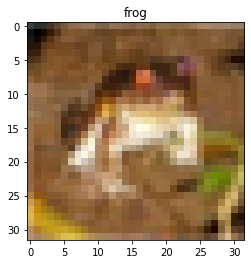

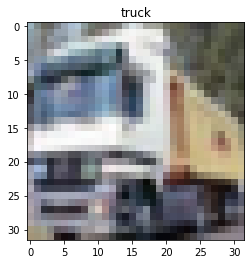

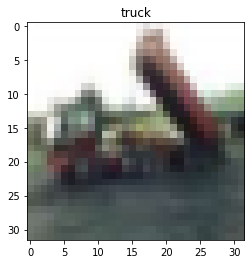

In [8]:
#Looking at a single image
for index in range(3):
    plt.imshow(train_images[index])
    plt.title(class_names[train_labels[index][0]])
    plt.show()

<p> Define architecture to be a stack of convolutional and pooling layers, which will extract features from the image: </p>

In [11]:
model = models.Sequential()
#input data shape: 32x32 images, rgb so 32x32x3. 
#Process 32 filters of size 3x3 over input data
#With rectified linear output function
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
#switch to 64 filters
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


<p> Now add dense layer to classify feature map outputs of conv and pooling layer stack: </p>

In [24]:
#add a layer to flatten feature maps to 1-d input
model.add(layers.Flatten())
#Dense layer with relu for classification
model.add(layers.Dense(64, activation='relu'))
#Output layer with 10 categories corresponding to our different labels
#Again scale output predictions so that probabilities add to 1.
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [27]:
#compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])         
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.5833 - accuracy: 0.7979 - val_loss: 0.8813 - val_accuracy: 0.7170
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.5410 - accuracy: 0.8114 - val_loss: 0.9823 - val_accuracy: 0.6866
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5110 - accuracy: 0.8228 - val_loss: 0.9673 - val_accuracy: 0.6965
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.4812 - accuracy: 0.8334 - val_loss: 0.9602 - val_accuracy: 0.7151
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.4535 - accuracy: 0.8406 - val_loss: 0.9874 - val_accuracy: 0.7068
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.4359 - accuracy: 0.8494 - val_loss: 1.0046 - val_accuracy: 0.7015
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4144 - accuracy: 0.8568 - val_loss: 1.0484 -

In [30]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 1.0742 - accuracy: 0.7049
0.7049000263214111


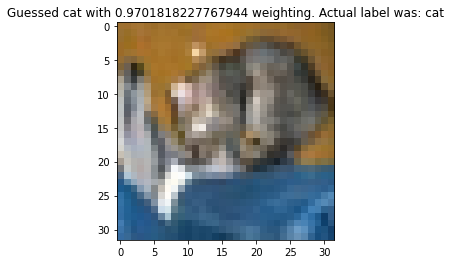

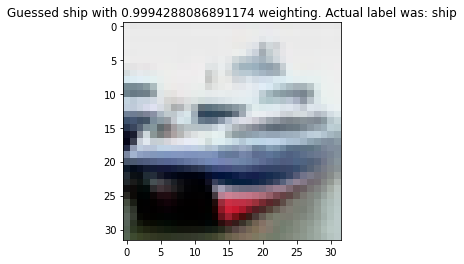

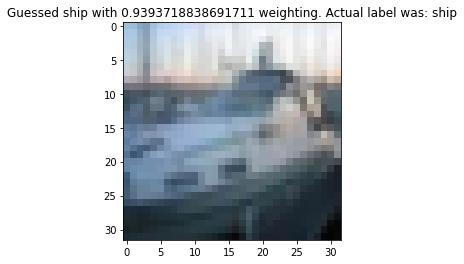

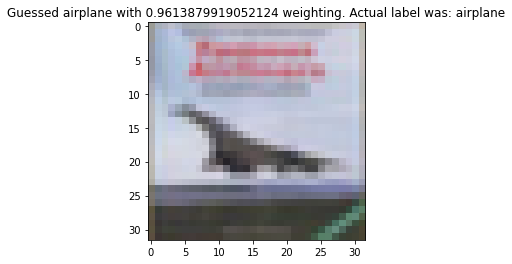

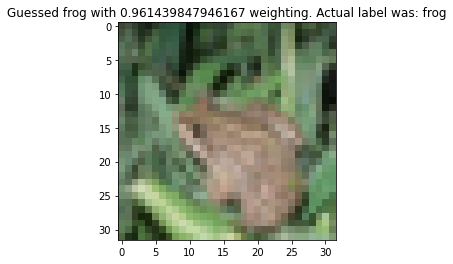

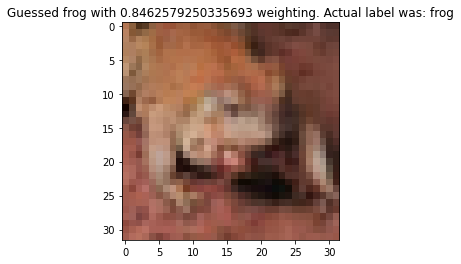

In [31]:
#pretty average accuracy. Let's see some individual guesses.
#predict on the test images
predictions = model.predict(test_images)

def guess_image(predictions, index):
    guess = np.argmax(predictions[index])
    plt.imshow(test_images[index])
    title=""
    title+="Guessed {}".format(class_names[guess])
    title+=" with {} weighting.".format(np.max(predictions[index]))
    title+=" Actual label was: {}".format(class_names[test_labels[index][0]])
    plt.title(title)
    plt.show()
    
for i in range(6):
    guess_image(predictions,i)